### Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

### Read data

In [2]:
dataset = pd.read_csv('SaYoPillow.csv')

In [3]:
dataset.head()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [4]:
colnames = ['snoring rt', 'respiration rt', 'body temp', 'limb movement', 
            'blood oxygen', 'eye movement', 'sleeping hrs', 'heart rt', 'stress level']
dataset.columns = colnames
dataset.head()

,snoring rt,respiration rt,body temp,limb movement,blood oxygen,eye movement,sleeping hrs,heart rt,stress level
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   snoring rt      630 non-null    float64
 1   respiration rt  630 non-null    float64
 2   body temp       630 non-null    float64
 3   limb movement   630 non-null    float64
 4   blood oxygen    630 non-null    float64
 5   eye movement    630 non-null    float64
 6   sleeping hrs    630 non-null    float64
 7   heart rt        630 non-null    float64
 8   stress level    630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


In [6]:
dataset.describe()

,snoring rt,respiration rt,body temp,limb movement,blood oxygen,eye movement,sleeping hrs,heart rt,stress level
count,630.000000,630.000000,630.00000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,71.600000,21.800000,92.80000,11.700000,90.900000,88.500000,3.700000,64.500000,2.000000
std,19.372833,3.966111,3.52969,4.299629,3.902483,11.893747,3.054572,9.915277,1.415337
min,45.000000,16.000000,85.00000,4.000000,82.000000,60.000000,0.000000,50.000000,0.000000
25%,52.500000,18.500000,90.50000,8.500000,88.500000,81.250000,0.500000,56.250000,1.000000
50%,70.000000,21.000000,93.00000,11.000000,91.000000,90.000000,3.500000,62.500000,2.000000
75%,91.250000,25.000000,95.50000,15.750000,94.250000,98.750000,6.500000,72.500000,3.000000
max,100.000000,30.000000,99.00000,19.000000,97.000000,105.000000,9.000000,85.000000,4.000000


### Some plots

In [7]:
def compareplot(data, col1, col2, target):
    sns.scatterplot(data=dataset, x=col1, y=col2, hue=target)
    plt.show()

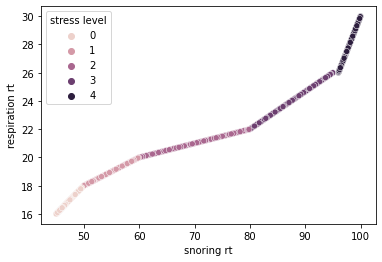

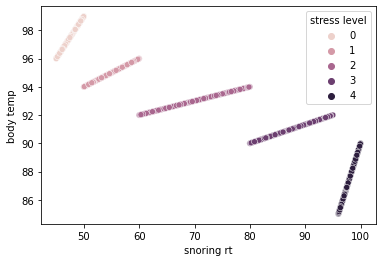

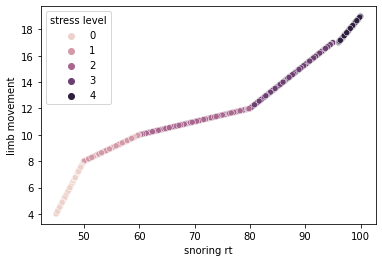

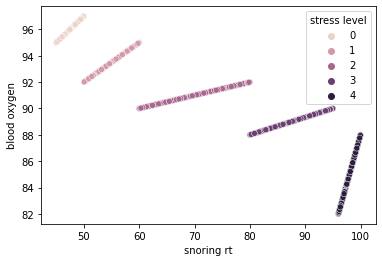

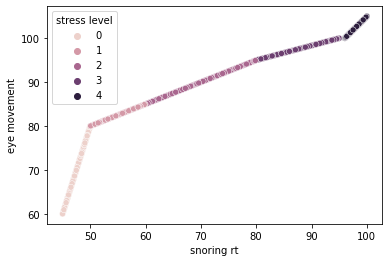

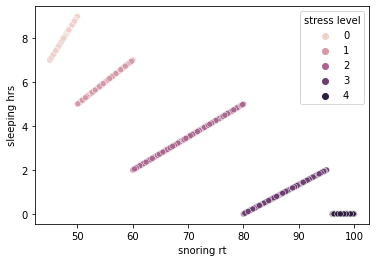

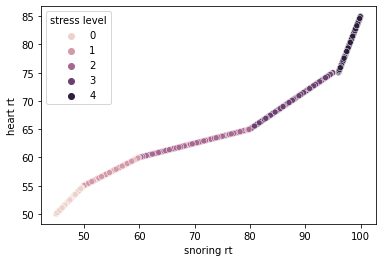

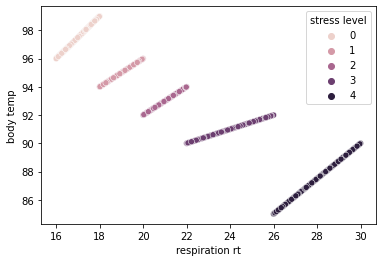

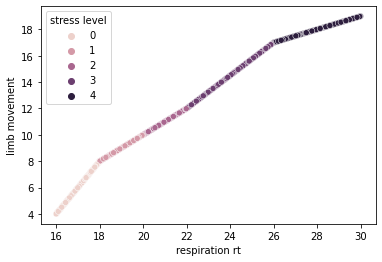

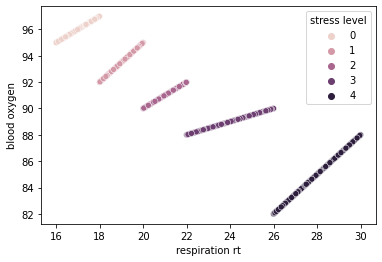

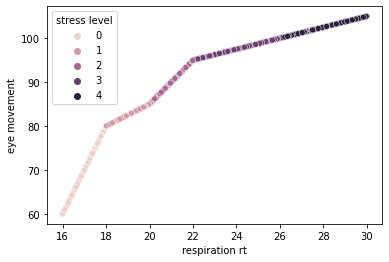

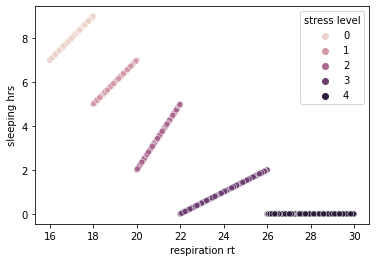

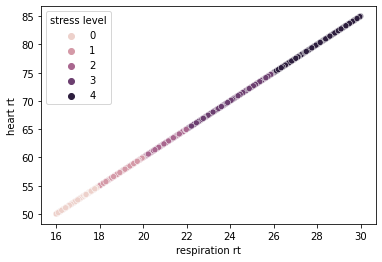

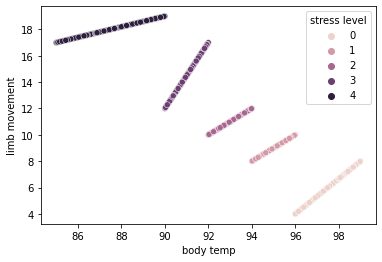

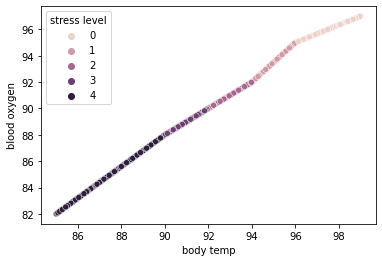

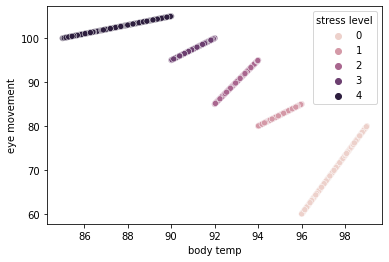

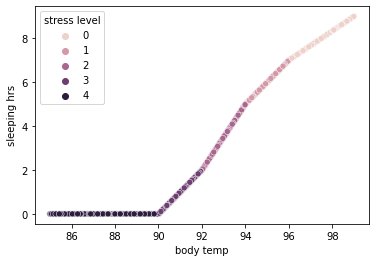

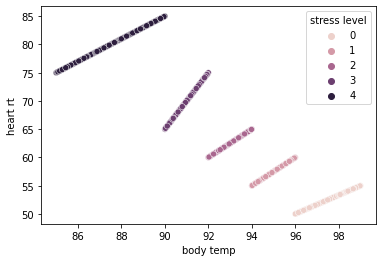

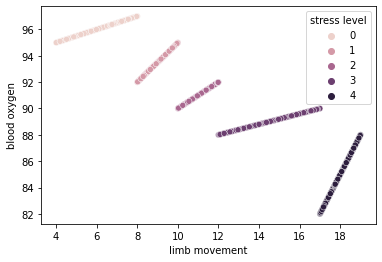

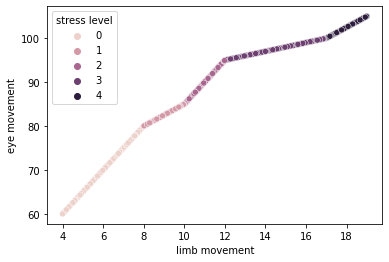

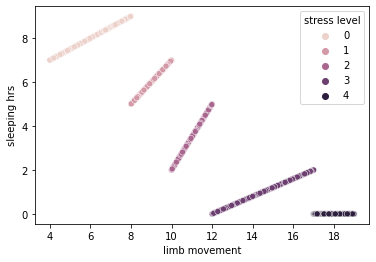

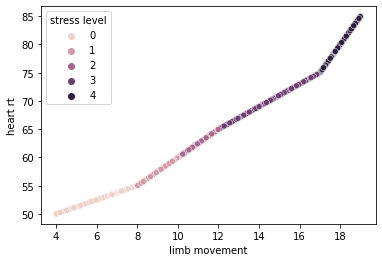

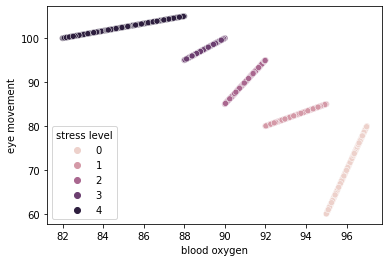

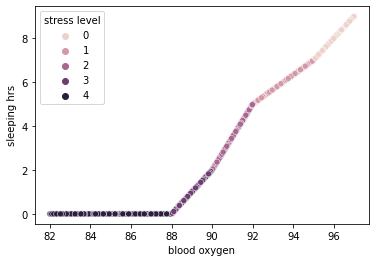

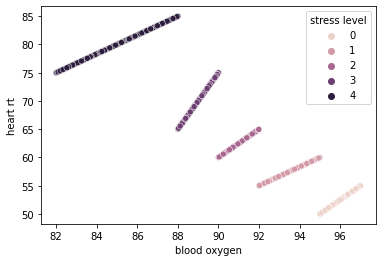

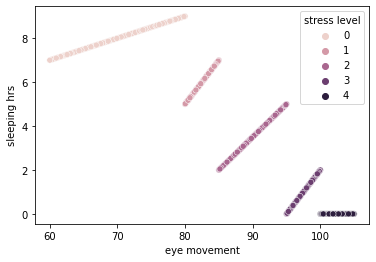

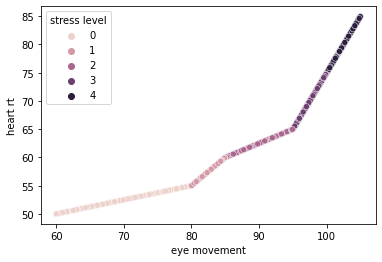

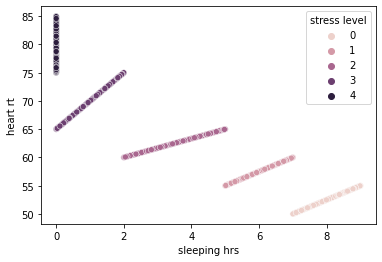

In [8]:
features = ['snoring rt', 'respiration rt', 'body temp', 'limb movement', 
            'blood oxygen', 'eye movement', 'sleeping hrs', 'heart rt']
visCols = []
for col1 in features:
    visCols.append(col1)
    for col2 in features:
        if col2 not in visCols:
            compareplot(dataset, col1, col2, 'stress level')

### Preparing the data

In [9]:
X = dataset.iloc[:, :-1].values

In [10]:
print(X)

[[ 93.8    25.68   91.84  ...  99.6     1.84   74.2  ]
 [ 91.64   25.104  91.552 ...  98.88    1.552  72.76 ]
 [ 60.     20.     96.    ...  85.      7.     60.   ]
 ...
 [ 97.504  27.504  86.88  ... 101.88    0.     78.76 ]
 [ 58.64   19.728  95.728 ...  84.32    6.728  59.32 ]
 [ 73.92   21.392  93.392 ...  91.96    4.088  63.48 ]]


In [11]:
y = dataset['stress level']

In [12]:
print(y)

0      3
1      3
2      1
3      3
4      0
      ..
625    2
626    0
627    4
628    1
629    2
Name: stress level, Length: 630, dtype: int64


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1, shuffle=True)

In [14]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(504, 8) (126, 8) (504,) (126,)


### Training model

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [17]:
predictions = rf_clf.predict(X_test)

### Evaluating RandomForest Classifier

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

In [19]:
accuracy_score(predictions, y_test)

0.9920634920634921

In [20]:
confusion_matrix(y_test, predictions)

array([[25,  0,  0,  0,  0],
       [ 0, 25,  0,  0,  0],
       [ 0,  1, 26,  0,  0],
       [ 0,  0,  0, 22,  0],
       [ 0,  0,  0,  0, 27]])

In [21]:
precision_score(y_test, predictions, average='weighted')

0.9923687423687424

In [22]:
recall_score(y_test, predictions, average='weighted')

0.9920634920634921

In [23]:
f1_score(y_test,predictions, average='weighted')

0.9920664282484483